In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [37]:
summary = pd.read_csv('data/atussum_2014.dat')


In [38]:
atus_who = pd.read_csv('data/atuswho_2014.dat')

activity = pd.read_csv('data/atusact_2014.dat')

cps = pd.read_csv('data/atuscps_2014.dat')

resp = pd.read_csv('data/atusresp_2014.dat')

rost = pd.read_csv('data/atusrost_2014.dat')

rostec = pd.read_csv('data/atusrostec_2014.dat')



In [40]:
data_summary = summary.rename(columns={
    'tucaseid': 'case_id',
    'TUFINLWGT': 'stat_weight',
    'TRYHHCHILD': 'age_youngest_child',
    'PEEDUCA': 'high_levl_edu',
    'PTDTRACE': 'race',
    'PEHSPNON': 'hisp', # 1 = yes , 2 = no
    'GTMETSTA': 'metro', # metro status - urban, suburban, etc
    'TEAGE': 'age', # topcoded to 85. All those 80 - 84 = 80. > 85 = 85
    'TESEX': 'sex', # 1 = male, 2 = female
    'TELFS': 'labor_status', # 1 = employed, at work
                             # 2 = employed, absent
                             # 3 = unemployed - on layoff
                             # 4 = unemployed - looking
                             # 5 = Not in labor force
    'TEMJOT': 'more_1_job_7_days', # 1 = yes, 2 = no
    'TRDPFTPT': 'ft_pt', # 1 = full time, 2 = part time
    'TESCHENR': 'school_enrolled', # 1 = yes, 2 = no
    'TESCHLVL': 'hs_or_col', # 1 = hs, 2 = col/univ
    'TRSPPRES': 'spouse_present', # 1 = yes, 2 = unmarried partner present, 3 = no
    'TESPEMPNOT': 'spouse_employed', # 1 = yes, 2 = no
    'TRERNWA': 'weekly_earnings', # the maximum value cannot be greater than 2884.61)
    'TRCHILDNUM': 'num_of_children',
    'TRSPFTPT': 'spouse_ft_pt',
    'TEHRUSLT': 'weekly_hours',
    'TUDIARYDAY': 'interview_day_of_week', # 1 = sun - 7 = sat
    'TRHOLIDAY': 'interview_on_holiday',
    'TRTEC': 'eldercare_time_spent',
    'TRTHH': 'childcare_time_spent',
    "t010101": "Sleeping",
    "t010102": "Sleeplessness",
    "t010199": "Sleeping, n.e.c.*",
    "t010201": "Washing, dressing and grooming oneself",
    "t010299": "Grooming, n.e.c.*",
    "t010301": "Health-related self care",
    "t010399": "Self care, n.e.c.*",
    "t010401": "Personal/Private activities",
    "t010499": "Personal activities, n.e.c.*",
    "t010501": "Personal emergencies",
    "t010599": "Personal care emergencies, n.e.c.*",
    "t019999": "Personal Care, n.e.c.*",
    "t020101": "Interior cleaning",
    "t020102": "Laundry",
    "t020103": "Sewing, repairing, & maintaining textiles",
    "t020104": "Storing interior hh items, inc. food",
    "t020199": "Housework, n.e.c.*",
    "t020201": "Food and drink preparation",
    "t020202": "Food presentation",
    "t020203": "Kitchen and food clean-up",
    "t020299": "Food & drink prep, presentation, & clean-up, n.e.c.*",
    "t020301": "Interior arrangement, decoration, & repairs",
    "t020302": "Building and repairing furniture",
    "t020303": "Heating and cooling",
    "t020399": "Interior maintenance, repair, & decoration, n.e.c.*",
    "t020401": "Exterior cleaning",
    "t020402": "Exterior repair, improvements, & decoration",
    "t020499": "Exterior maintenance, repair & decoration, n.e.c.*",
    "t020501": "Lawn, garden, and houseplant care",
    "t020502": "Ponds, pools, and hot tubs",
    "t020599": "Lawn and garden, n.e.c.*",
    "t020601": "Care for animals and pets (not veterinary care)",
    "t020602": "Walking / exercising / playing with animals",
    "t020699": "Pet and animal care, n.e.c.*",
    "t020701": "Vehicle repair and maintenance (by self)",
    "t020799": "Vehicles, n.e.c.*",
    "t020801": "Appliance, tool, and toy set-up, repair, & maintenance (by self)",
    "t020899": "Appliances and tools, n.e.c.*",
    "t020901": "Financial management",
    "t020902": "Household & personal organization and planning",
    "t020903": "HH & personal mail & messages (except e-mail)",
    "t020904": "HH & personal e-mail and messages",
    "t020905": "Home security",
    "t020999": "Household management, n.e.c.*",
    "t029999": "Household activities, n.e.c.*",
    "t030101": "Physical care for hh children",
    "t030102": "Reading to/with hh children",
    "t030103": "Playing with hh children, not sports",
    "t030104": "Arts and crafts with hh children",
    "t030105": "Playing sports with hh children",
    "t030106": "Talking with/listening to hh children",
    "t030108": "Organization & planning for hh children",
    "t030109": "Looking after hh children (as a primary activity)",
    "t030110": "Attending hh children's events",
    "t030111": "Waiting for/with hh children",
    "t030112": "Picking up/dropping off hh children",
    "t030199": "Caring for & helping hh children, n.e.c.*",
    "t030201": "Homework (hh children)",
    "t030202": "Meetings and school conferences (hh children)",
    "t030203": "Home schooling of hh children",
    "t030204": "Waiting associated with hh children's education",
    "t030299": "Activities related to hh child's education, n.e.c.*",
    "t030301": "Providing medical care to hh children",
    "t030302": "Obtaining medical care for hh children",
    "t030303": "Waiting associated with hh children's health",
    "t030399": "Activities related to hh child's health, n.e.c.*",
    "t030401": "Physical care for hh adults",
    "t030402": "Looking after hh adult (as a primary activity)",
    "t030403": "Providing medical care to hh adult",
    "t030404": "Obtaining medical and care services for hh adult",
    "t030405": "Waiting associated with caring for household adults",
    "t030499": "Caring for household adults, n.e.c.*",
    "t030501": "Helping hh adults",
    "t030502": "Organization & planning for hh adults",
    "t030503": "Picking up/dropping off hh adult",
    "t030504": "Waiting associated with helping hh adults",
    "t030599": "Helping household adults, n.e.c.*",
    "t039999": "Caring for & helping hh members, n.e.c.*",
    "t040101": "Physical care for nonhh children",
    "t040102": "Reading to/with nonhh children",
    "t040103": "Playing with nonhh children, not sports",
    "t040104": "Arts and crafts with nonhh children",
    "t040105": "Playing sports with nonhh children",
    "t040106": "Talking with/listening to nonhh children",
    "t040108": "Organization & planning for nonhh children",
    "t040109": "Looking after nonhh children (as primary activity)",
    "t040110": "Attending nonhh children's events",
    "t040111": "Waiting for/with nonhh children",
    "t040112": "Dropping off/picking up nonhh children",
    "t040199": "Caring for and helping nonhh children, n.e.c.*",
    "t040201": "Homework (nonhh children)",
    "t040202": "Meetings and school conferences (nonhh children)",
    "t040203": "Home schooling of nonhh children",
    "t040204": "Waiting associated with nonhh children's education",
    "t040299": "Activities related to nonhh child's educ., n.e.c.*",
    "t040301": "Providing medical care to nonhh children",
    "t040302": "Obtaining medical care for nonhh children",
    "t040303": "Waiting associated with nonhh children's health",
    "t040399": "Activities related to nonhh child's health, n.e.c.*",
    "t040401": "Physical care for nonhh adults",
    "t040402": "Looking after nonhh adult (as a primary activity)",
    "t040403": "Providing medical care to nonhh adult",
    "t040404": "Obtaining medical and care services for nonhh adult",
    "t040405": "Waiting associated with caring for nonhh adults",
    "t040499": "Caring for nonhh adults, n.e.c.*",
    "t040501": "Housework, cooking, & shopping assistance for nonhh adults",
    "t040502": "House & lawn maintenance & repair assistance for nonhh adults",
    "t040503": "Animal & pet care assistance for nonhh adults",
    "t040504": "Vehicle & appliance maintenance/repair assistance for nonhh adults",
    "t040505": "Financial management assistance for nonhh adults",
    "t040506": "Household management & paperwork assistance for nonhh adults",
    "t040507": "Picking up/dropping off nonhh adult",
    "t040508": "Waiting associated with helping nonhh adults",
    "t040599": "Helping nonhh adults, n.e.c.*",
    "t049999": "Caring for & helping nonhh members, n.e.c.*",
    "t050101": "Work, main job",
    "t050102": "Work, other job(s)",
    "t050103": "Security procedures related to work",
    "t050104": "Waiting associated with working",
    "t050199": "Working, n.e.c.*",
    "t050201": "Socializing, relaxing, and leisure as part of job",
    "t050202": "Eating and drinking as part of job",
    "t050203": "Sports and exercise as part of job",
    "t050204": "Security procedures as part of job",
    "t050205": "Waiting associated with work-related activities",
    "t050299": "Work-related activities, n.e.c.*",
    "t050301": "Income-generating hobbies, crafts, and food",
    "t050302": "Income-generating performances",
    "t050303": "Income-generating services",
    "t050304": "Income-generating rental property activities",
    "t050305": "Waiting associated with other income-generating activities",
    "t050399": "Other income-generating activities, n.e.c.*",
    "t050401": "Job search activities",
    "t050403": "Job interviewing",
    "t050404": "Waiting associated with job search or interview",
    "t050405": "Security procedures rel. to job search/interviewing",
    "t050499": "Job search and Interviewing, n.e.c.*",
    "t059999": "Work and work-related activities, n.e.c.*",
    "t060101": "Taking class for degree, certification, or licensure",
    "t060102": "Taking class for personal interest",
    "t060103": "Waiting associated with taking classes",
    "t060104": "Security procedures rel. to taking classes",
    "t060199": "Taking class, n.e.c.*",
    "t060201": "Extracurricular club activities",
    "t060202": "Extracurricular music & performance activities",
    "t060203": "Extracurricular student government activities",
    "t060204": "Waiting associated with extracurricular activities",
    "t060299": "Education-related extracurricular activities, n.e.c.*",
    "t060301": "Research/homework for class for degree, certification, or licensure",
    "t060302": "Research/homework for class for pers. interest",
    "t060303": "Waiting associated with research/homework",
    "t060399": "Research/homework n.e.c.*",
    "t060401": "Administrative activities: class for degree, certification, or licensure",
    "t060402": "Administrative activities: class for personal interest",
    "t060403": "Waiting associated w/admin. activities (education)",
    "t060499": "Administrative for education, n.e.c.*",
    "t069999": "Education, n.e.c.*",
    "t070101": "Grocery shopping",
    "t070102": "Purchasing gas",
    "t070103": "Purchasing food (not groceries)",
    "t070104": "Shopping, except groceries, food and gas",
    "t070105": "Waiting associated with shopping",
    "t070199": "Shopping, n.e.c.*",
    "t070201": "Comparison shopping",
    "t070299": "Researching purchases, n.e.c.*",
    "t070301": "Security procedures rel. to consumer purchases",
    "t070399": "Security procedures rel. to consumer purchases, n.e.c.*",
    "t079999": "Consumer purchases, n.e.c.*",
    "t080101": "Using paid childcare services",
    "t080102": "Waiting associated w/purchasing childcare svcs",
    "t080199": "Using paid childcare services, n.e.c.*",
    "t080201": "Banking",
    "t080202": "Using other financial services",
    "t080203": "Waiting associated w/banking/financial services",
    "t080299": "Using financial services and banking, n.e.c.*",
    "t080301": "Using legal services",
    "t080302": "Waiting associated with legal services",
    "t080399": "Using legal services, n.e.c.*",
    "t080401": "Using health and care services outside the home",
    "t080402": "Using in-home health and care services",
    "t080403": "Waiting associated with medical services",
    "t080499": "Using medical services, n.e.c.*",
    "t080501": "Using personal care services",
    "t080502": "Waiting associated w/personal care services",
    "t080599": "Using personal care services, n.e.c.*",
    "t080601": "Activities rel. to purchasing/selling real estate",
    "t080602": "Waiting associated w/purchasing/selling real estate",
    "t080699": "Using real estate services, n.e.c.*",
    "t080701": "Using veterinary services",
    "t080702": "Waiting associated with veterinary services",
    "t080799": "Using veterinary services, n.e.c.*",
    "t080801": "Security procedures rel. to professional/personal svcs.",
    "t080899": "Security procedures rel. to professional/personal svcs n.e.c.*",
    "t089999": "Professional and personal services, n.e.c.*",
    "t090101": "Using interior cleaning services",
    "t090102": "Using meal preparation services",
    "t090103": "Using clothing repair and cleaning services",
    "t090104": "Waiting associated with using household services",
    "t090199": "Using household services, n.e.c.*",
    "t090201": "Using home maint/repair/décor/construction svcs",
    "t090202": "Waiting associated w/ home main/repair/décor/constr",
    "t090299": "Using home maint/repair/décor/constr services, n.e.c.*",
    "t090301": "Using pet services",
    "t090302": "Waiting associated with pet services",
    "t090399": "Using pet services, n.e.c.*",
    "t090401": "Using lawn and garden services",
    "t090402": "Waiting associated with using lawn & garden services",
    "t090499": "Using lawn and garden services, n.e.c.*",
    "t090501": "Using vehicle maintenance or repair services",
    "t090502": "Waiting associated with vehicle main. or repair svcs",
    "t090599": "Using vehicle maint. & repair svcs, n.e.c.*",
    "t099999": "Using household services, n.e.c.*",
    "t100101": "Using police and fire services",
    "t100102": "Using social services",
    "t100103": "Obtaining licenses & paying fines, fees, taxes",
    "t100199": "Using government services, n.e.c.*",
    "t100201": "Civic obligations & participation",
    "t100299": "Civic obligations & participation, n.e.c.*",
    "t100304": "Waiting associated with using government services",
    "t100305": "Waiting associated with civic obligations & participation",
    "t100399": "Waiting assoc. w/govt svcs or civic obligations, n.e.c.*",
    "t100401": "Security procedures rel. to govt svcs/civic obligations",
    "t100499": "Security procedures rel. to govt svcs/civic obligations, n.e.c.*",
    "t109999": "Government services, n.e.c.*",
    "t110101": "Eating and drinking",
    "t110199": "Eating and drinking, n.e.c.*",
    "t110201": "Waiting associated w/eating & drinking",
    "t110299": "Waiting associated with eating & drinking, n.e.c.*",
    "t119999": "Eating and drinking, n.e.c.*",
    "t120101": "Socializing and communicating with others",
    "t120199": "Socializing and communicating, n.e.c.*",
    "t120201": "Attending or hosting parties/receptions/ceremonies",
    "t120202": "Attending meetings for personal interest (not volunteering)",
    "t120299": "Attending/hosting social events, n.e.c.*",
    "t120301": "Relaxing, thinking",
    "t120302": "Tobacco and drug use",
    "t120303": "Television and movies (not religious)",
    "t120304": "Television (religious)",
    "t120305": "Listening to the radio",
    "t120306": "Listening to/playing music (not radio)",
    "t120307": "Playing games",
    "t120308": "Computer use for leisure (exc. Games)",
    "t120309": "Arts and crafts as a hobby",
    "t120310": "Collecting as a hobby",
    "t120311": "Hobbies, except arts & crafts and collecting",
    "t120312": "Reading for personal interest",
    "t120313": "Writing for personal interest",
    "t120399": "Relaxing and leisure, n.e.c.*",
    "t120401": "Attending performing arts",
    "t120402": "Attending museums",
    "t120403": "Attending movies/film",
    "t120404": "Attending gambling establishments",
    "t120405": "Security procedures rel. to arts & entertainment",
    "t120499": "Arts and entertainment, n.e.c.*",
    "t120501": "Waiting assoc. w/socializing & communicating",
    "t120502": "Waiting assoc. w/attending/hosting social events",
    "t120503": "Waiting associated with relaxing/leisure",
    "t120504": "Waiting associated with arts & entertainment",
    "t120599": "Waiting associated with socializing, n.e.c.*",
    "t129999": "Socializing, relaxing, and leisure, n.e.c.*",
    "t130101": "Doing aerobics",
    "t130102": "Playing baseball",
    "t130103": "Playing basketball",
    "t130104": "Biking",
    "t130105": "Playing billiards",
    "t130106": "Boating",
    "t130107": "Bowling",
    "t130108": "Climbing, spelunking, caving",
    "t130109": "Dancing",
    "t130110": "Participating in equestrian sports",
    "t130111": "Fencing",
    "t130112": "Fishing",
    "t130113": "Playing football",
    "t130114": "Golfing",
    "t130115": "Doing gymnastics",
    "t130116": "Hiking",
    "t130117": "Playing hockey",
    "t130118": "Hunting",
    "t130119": "Participating in martial arts",
    "t130120": "Playing racquet sports",
    "t130121": "Participating in rodeo competitions",
    "t130122": "Rollerblading",
    "t130123": "Playing rugby",
    "t130124": "Running",
    "t130125": "Skiing, ice skating, snowboarding",
    "t130126": "Playing soccer",
    "t130127": "Softball",
    "t130128": "Using cardiovascular equipment",
    "t130129": "Vehicle touring/racing",
    "t130130": "Playing volleyball",
    "t130131": "Walking",
    "t130132": "Participating in water sports",
    "t130133": "Weightlifting/strength training",
    "t130134": "Working out, unspecified",
    "t130135": "Wrestling",
    "t130136": "Doing yoga",
    "t130199": "Playing sports n.e.c.*",
    "t130201": "Watching aerobics",
    "t130202": "Watching baseball",
    "t130203": "Watching basketball",
    "t130204": "Watching biking",
    "t130205": "Watching billiards",
    "t130206": "Watching boating",
    "t130207": "Watching bowling",
    "t130208": "Watching climbing, spelunking, caving",
    "t130209": "Watching dancing",
    "t130210": "Watching equestrian sports",
    "t130211": "Watching fencing",
    "t130212": "Watching fishing",
    "t130213": "Watching football",
    "t130214": "Watching golfing",
    "t130215": "Watching gymnastics",
    "t130216": "Watching hockey",
    "t130217": "Watching martial arts",
    "t130218": "Watching racquet sports",
    "t130219": "Watching rodeo competitions",
    "t130220": "Watching rollerblading",
    "t130221": "Watching rugby",
    "t130222": "Watching running",
    "t130223": "Watching skiing, ice skating, snowboarding",
    "t130224": "Watching soccer",
    "t130225": "Watching softball",
    "t130226": "Watching vehicle touring/racing",
    "t130227": "Watching volleyball",
    "t130228": "Watching walking",
    "t130229": "Watching water sports",
    "t130230": "Watching weightlifting/strength training",
    "t130231": "Watching people working out, unspecified",
    "t130232": "Watching wrestling",
    "t130299": "Attending sporting events, n.e.c.*",
    "t130301": "Waiting related to playing sports or exercising",
    "t130302": "Waiting related to attending sporting events",
    "t130399": "Waiting associated with sports, exercise, & recreation, n.e.c.*",
    "t130401": "Security related to playing sports or exercising",
    "t130402": "Security related to attending sporting events",
    "t130499": "Security related to sports, exercise, & recreation, n.e.c.*",
    "t139999": "Sports, exercise, & recreation, n.e.c.*",
    "t140101": "Attending religious services",
    "t140102": "Participation in religious practices",
    "t140103": "Waiting associated w/religious & spiritual activities",
    "t140104": "Security procedures rel. to religious & spiritual activities",
    "t140105": "Religious education activities",
    "t149999": "Religious and spiritual activities, n.e.c.*",
    "t150101": "Computer use",
    "t150102": "Organizing and preparing",
    "t150103": "Reading",
    "t150104": "Telephone calls (except hotline counseling)",
    "t150105": "Writing",
    "t150106": "Fundraising",
    "t150199": "Administrative & support activities, n.e.c.*",
    "t150201": "Food preparation, presentation, clean-up",
    "t150202": "Collecting & delivering clothing & other goods",
    "t150203": "Providing care",
    "t150204": "Teaching, leading, counseling, mentoring",
    "t150299": "Social service & care activities, n.e.c.*",
    "t150301": "Building houses, wildlife sites, & other structures",
    "t150302": "Indoor & outdoor maintenance, repair, & clean-up",
    "t150399": "Indoor & outdoor maintenance, building & clean-up activities, n.e.c.*",
    "t150401": "Performing",
    "t150402": "Serving at volunteer events & cultural activities",
    "t150499": "Participating in performance & cultural activities, n.e.c.*",
    "t150501": "Attending meetings, conferences, & training",
    "t150599": "Attending meetings, conferences, & training, n.e.c.*",
    "t150601": "Public health activities",
    "t150602": "Public safety activities",
    "t150699": "Public health & safety activities, n.e.c.*",
    "t150701": "Waiting associated with volunteer activities",
    "t150799": "Waiting associated with volunteer activities, n.e.c.*",
    "t150801": "Security procedures related to volunteer activities",
    "t150899": "Security procedures related to volunteer activities, n.e.c.*",
    "t159999": "Volunteer activities, n.e.c.*",
    "t160101": "Telephone calls to/from family members",
    "t160102": "Telephone calls to/from friends, neighbors, or acquaintances",
    "t160103": "Telephone calls to/from education services providers",
    "t160104": "Telephone calls to/from salespeople",
    "t160105": "Telephone calls to/from professional or personal care svcs providers",
    "t160106": "Telephone calls to/from household services providers",
    "t160107": "Telephone calls to/from paid child or adult care providers",
    "t160108": "Telephone calls to/from government officials",
    "t160199": "Telephone calls (to or from), n.e.c.*",
    "t160201": "Waiting associated with telephone calls",
    "t160299": "Waiting associated with telephone calls, n.e.c.*",
    "t169999": "Telephone calls, n.e.c.*",
    "t180101": "Travel related to personal care",
    "t180199": "Travel related to personal care, n.e.c.*",
    "t180201": "Travel related to housework",
    "t180202": "Travel related to food & drink prep., clean-up, & presentation",
    "t180203": "Travel related to interior maintenance, repair, & decoration",
    "t180204": "Travel related to exterior maintenance, repair, & decoration",
    "t180205": "Travel related to lawn, garden, and houseplant care",
    "t180206": "Travel related to care for animals and pets (not vet care)",
    "t180207": "Travel related to vehicle care & maintenance (by self)",
    "t180208": "Travel related to appliance, tool, and toy set-up, repair, & maintenance (by self)",
    "t180209": "Travel related to household management",
    "t180299": "Travel related to household activities, n.e.c.*",
    "t180301": "Travel related to caring for & helping hh children",
    "t180302": "Travel related to hh children's education",
    "t180303": "Travel related to hh children's health",
    "t180304": "Travel related to caring for hh adults",
    "t180305": "Travel related to helping hh adults",
    "t180399": "Travel rel. to caring for & helping hh members, n.e.c.*",
    "t180401": "Travel related to caring for and helping nonhh children",
    "t180402": "Travel related to nonhh children's education",
    "t180403": "Travel related to nonhh children's health",
    "t180404": "Travel related to caring for nonhh adults",
    "t180405": "Travel related to helping nonhh adults",
    "t180499": "Travel rel. to caring for & helping nonhh members, n.e.c.*",
    "t180501": "Travel related to working",
    "t180502": "Travel related to work-related activities",
    "t180503": "Travel related to income-generating activities",
    "t180504": "Travel related to job search & interviewing",
    "t180599": "Travel related to work, n.e.c.*",
    "t180601": "Travel related to taking class",
    "t180602": "Travel related to extracurricular activities (ex. Sports)",
    "t180603": "Travel related to research/homework",
    "t180604": "Travel related to registration/administrative activities",
    "t180699": "Travel related to education, n.e.c.*",
    "t180701": "Travel related to grocery shopping",
    "t180702": "Travel related to purchasing gas",
    "t180703": "Travel related to purchasing food (not groceries)",
    "t180704": "Travel related to shopping, ex groceries, food, and gas",
    "t180799": "Travel related to consumer purchases, n.e.c.*",
    "t180801": "Travel related to using childcare services",
    "t180802": "Travel related to using financial services and banking",
    "t180803": "Travel related to using legal services",
    "t180804": "Travel related to using medical services",
    "t180805": "Travel related to using personal care services",
    "t180806": "Travel related to using real estate services",
    "t180807": "Travel related to using veterinary services",
    "t180899": "Travel rel. to using prof. & personal care services, n.e.c.*",
    "t180901": "Travel related to using household services",
    "t180902": "Travel related to using home main./repair/décor./construction svcs",
    "t180903": "Travel related to using pet services (not vet)",
    "t180904": "Travel related to using lawn and garden services",
    "t180905": "Travel related to using vehicle maintenance & repair services",
    "t180999": "Travel related to using household services, n.e.c.*",
    "t181001": "Travel related to using government services",
    "t181002": "Travel related to civic obligations & participation",
    "t181099": "Travel rel. to govt svcs & civic obligations, n.e.c.*",
    "t181101": "Travel related to eating and drinking",
    "t181199": "Travel related to eating and drinking, n.e.c.*",
    "t181201": "Travel related to socializing and communicating",
    "t181202": "Travel related to attending or hosting social events",
    "t181203": "Travel related to relaxing and leisure",
    "t181204": "Travel related to arts and entertainment",
    "t181205": "Travel as a form of entertainment",
    "t181299": "Travel rel. to socializing, relaxing, & leisure, n.e.c.*",
    "t181301": "Travel related to participating in sports/exercise/recreation",
    "t181302": "Travel related to attending sporting/recreational events",
    "t181399": "Travel related to sports, exercise, & recreation, n.e.c.*",
    "t181401": "Travel related to religious/spiritual practices",
    "t181499": "Travel rel. to religious/spiritual activities, n.e.c.*",
    "t181501": "Travel related to volunteering",
    "t181599": "Travel related to volunteer activities, n.e.c.*",
    "t181601": "Travel related to phone calls",
    "t181699": "Travel rel. to phone calls, n.e.c.*",
    "t181801": "Security procedures related to traveling",
    "t181899": "Security procedures related to traveling, n.e.c.*",
    "t189999": "Traveling, n.e.c.*",
    "t500101": "Insufficient detail in verbatim",
    "t500103": "Missing travel or destination",
    "t500105": "Respondent refused to provide information/'none of your business'",
    "t500106": "Gap/can't remember",
    "t500107": "Unable to code activity at 1st tier",
    "t509999": "Data codes, n.e.c.*"
})

In [56]:
data_summary.head()

,case_id,stat_weight,age_youngest_child,age,sex,high_levl_edu,race,hisp,metro,labor_status,...,Travel related to phone calls,"Travel rel. to phone calls, n.e.c.*",Security procedures related to traveling,"Security procedures related to traveling, n.e.c.*","Traveling, n.e.c.*",Insufficient detail in verbatim,Missing travel or destination,Respondent refused to provide information/'none of your business',Gap/can't remember,Unable to code activity at 1st tier
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,23147368.359655,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,20941823.429044,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2505899.417166,NaN,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,15928231.823165,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


In [41]:
[x for x in data_summary.keys()]

['case_id',
 'stat_weight',
 'age_youngest_child',
 'age',
 'sex',
 'high_levl_edu',
 'race',
 'hisp',
 'metro',
 'labor_status',
 'more_1_job_7_days',
 'ft_pt',
 'school_enrolled',
 'hs_or_col',
 'spouse_present',
 'spouse_employed',
 'weekly_earnings',
 'num_of_children',
 'spouse_ft_pt',
 'weekly_hours',
 'interview_day_of_week',
 'interview_on_holiday',
 'eldercare_time_spent',
 'childcare_time_spent',
 'Sleeping',
 'Sleeplessness',
 'Washing, dressing and grooming oneself',
 'Grooming, n.e.c.*',
 'Health-related self care',
 'Self care, n.e.c.*',
 'Personal/Private activities',
 'Personal emergencies',
 'Personal Care, n.e.c.*',
 'Interior cleaning',
 'Laundry',
 'Sewing, repairing, & maintaining textiles',
 'Storing interior hh items, inc. food',
 'Housework, n.e.c.*',
 'Food and drink preparation',
 'Food presentation',
 'Kitchen and food clean-up',
 'Interior arrangement, decoration, & repairs',
 'Building and repairing furniture',
 'Heating and cooling',
 'Interior maintenance

In [55]:
data_summary = data_summary.replace(-1, np.nan)


In [58]:
total_participants = data_summary[['case_id','age', 'sex']]
male = total_participants[total_participants.sex == 1]  # Male = 1
female = total_participants[total_participants.sex == 2]  # Female = 2

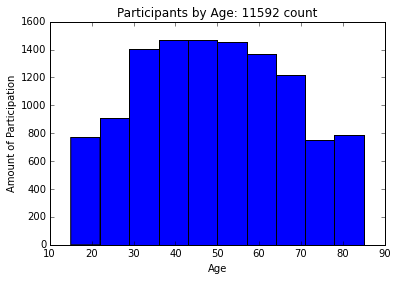

In [61]:
total_participants['age'].plot(kind='hist')
plt.title("Participants by Age: {} count".format(total_participants['case_id'].count()))
plt.ylabel("Amount of Participation")
plt.xlabel("Age")
plt.show()

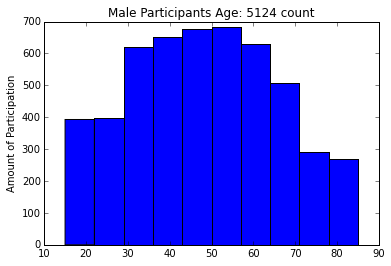

In [65]:
male['age'].plot(kind='hist')
plt.title("Male Participants Age: {} count".format(male['age'].count()))
plt.ylabel("Amount of Participation")
plt.show()

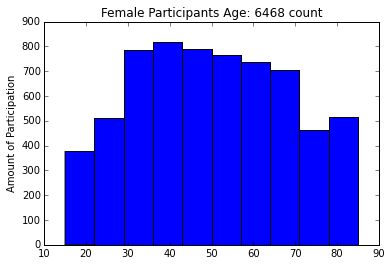

In [66]:
female['age'].plot(kind='hist')
plt.title("Female Participants Age: {} count".format(female['age'].count()))
plt.ylabel("Amount of Participation")
plt.show()

In [31]:
data_summary["Banking"].sum() #minutes spent "Banking"

3299

In [46]:
data_summary[[ 'Running', 'Walking', 'Biking']].sum()

Running     8707
Walking    36576
Biking      5863
dtype: int64

In [47]:
active = data_summary[[ 'Running', 'Walking', 'Biking']].sum()

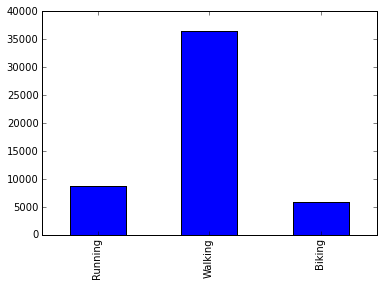

In [53]:
active.plot(kind = 'bar')
plt.show()

# Running, Walking, or Biking?
The above graph shows the popular choice of basic excercise.  Of course, its WALKING! Followed by running. I would love to think this is because Americans "love their walking/running", and are truly behind the "foot to the pavement" moement.  However, I'm sure its because the equipment needed is minimal.  Shoes... thats it... thats all you need.  Go Figure...

In [49]:
data_summary[['Reading to/with hh children', 'Playing with hh children, not sports', 'Arts and crafts with hh children', 'Playing sports with hh children', 'Talking with/listening to hh children', 'Homework (hh children)']].sum()

Reading to/with hh children              12909
Playing with hh children, not sports     88423
Arts and crafts with hh children          1232
Playing sports with hh children           3297
Talking with/listening to hh children    14410
Homework (hh children)                   25641
dtype: int64

In [50]:
child_time = data_summary[['Reading to/with hh children', 'Playing with hh children, not sports', 'Arts and crafts with hh children', 'Playing sports with hh children', 'Talking with/listening to hh children', 'Homework (hh children)']].sum()

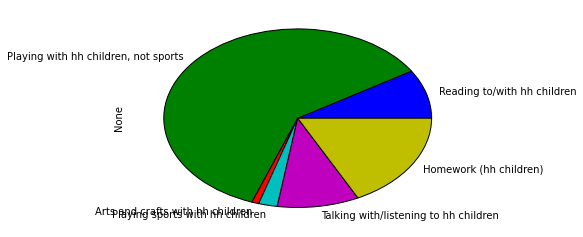

In [54]:
child_time.plot(kind = 'pie')
plt.show()

# Time with the kids

The above pie chart show the anout of time spent wth kids in the household.  I think this could be a little misleading.  I'm going to assume all this time spent playing with kids and not sports could mean a lot of things...  Video games perhaps? Nerf Gun Wars (my personal favorite)?  However, I am pleased to see the amout of time spent reading and doing homework with kids.  Way to go America! Wish I could believe you...